In [1]:
import pandas as pd
import numpy as np

### Load Data

In [2]:
df = pd.read_csv("../data/data_cleaned.csv", low_memory=False)
df.head()

,Runner ID,First Name,Surname,Nat.,Gender,Age,Age Group,Cat,YOB,Race Count,...,Cat. Rank,Finish Percentage,Performance Ratio,Distance/Time,Distance KM,Terrain,Time Seconds Finish,Distance Finish,Average Speed,Avg.Speed km/h
0,1354671,Allen,Boyce,RSA,M,NaN,Unknown,Unknown,NaN,0.0,...,1.0,0.1,1.000000,87km,87.0,road,23963.0,NaN,275.436782,13.070
1,1384818,Dermock,Parr,RSA,M,NaN,Unknown,Unknown,NaN,0.0,...,2.0,0.2,0.783335,87km,87.0,road,30591.0,NaN,351.620690,10.238
2,1384846,Gordon,Morrison,RSA,M,NaN,Unknown,Unknown,NaN,0.0,...,3.0,0.3,0.746023,87km,87.0,road,32121.0,NaN,369.206897,9.751
3,1384834,Max,Trimborn,RSA,M,NaN,Unknown,Unknown,NaN,0.0,...,4.0,0.4,0.734881,87km,87.0,road,32608.0,NaN,374.804598,9.605
4,1384824,Edgar,Marie,RSA,M,53.0,50-59,M50,1887.0,0.0,...,1.0,0.5,0.731315,87km,87.0,road,32767.0,NaN,376.632184,9.558


In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.strftime('%Y')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df.dropna(subset=['Year'], inplace=True)
df['Year'] = df['Year'].astype(int)

In [4]:
df.columns

Index(['Runner ID', 'First Name', 'Surname', 'Nat.', 'Gender', 'Age',
       'Age Group', 'Cat', 'YOB', 'Race Count', 'Cumulative Distance KM',
       'Event ID', 'Event', 'Event Type', 'Date', 'Race Location',
       'Elevation Gain', 'Elevation Gain per KM', 'Total Finishers',
       'Male Finishers', 'Female Finishers', 'Time Seconds Winner',
       'Distance Winner', 'Rank', 'Rank M/F', 'Cat. Rank', 'Finish Percentage',
       'Performance Ratio', 'Distance/Time', 'Distance KM', 'Terrain',
       'Time Seconds Finish', 'Distance Finish', 'Average Speed',
       'Avg.Speed km/h', 'Year'],
      dtype='object')

### Historic analysis

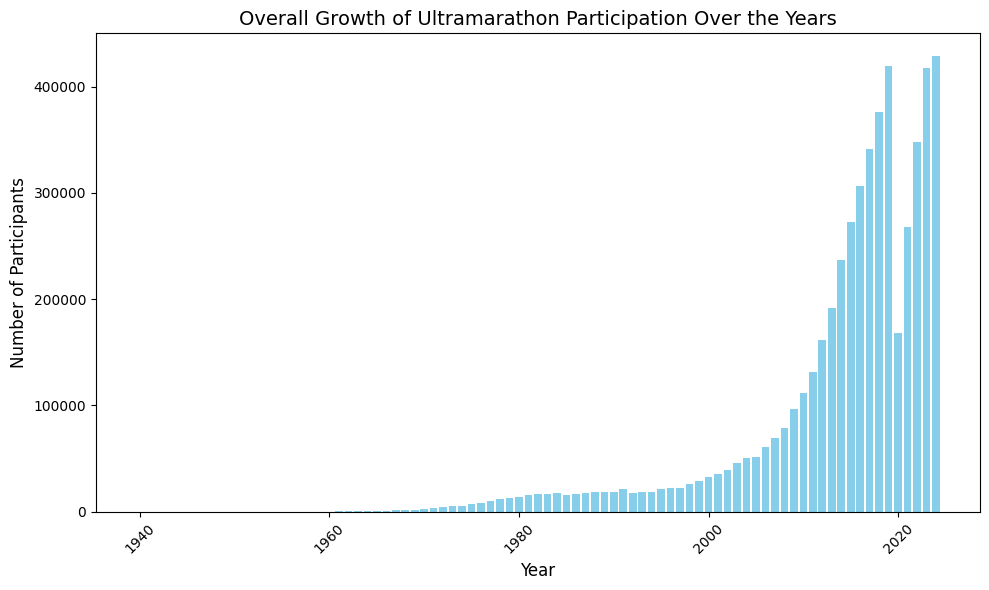

In [5]:
import matplotlib.pyplot as plt

# 3. Overall Growth of Participation Over Time

# Group by year and count unique runner IDs (or simply count rows if each row = one runner)
yearly_counts = df.groupby('Year')['Runner ID'].nunique().reset_index(name='Total_Participants')

# Plot overall participation growth
plt.figure(figsize=(10, 6))
plt.bar(yearly_counts['Year'], yearly_counts['Total_Participants'], color='skyblue')
plt.title('Overall Growth of Ultramarathon Participation Over the Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Participants', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

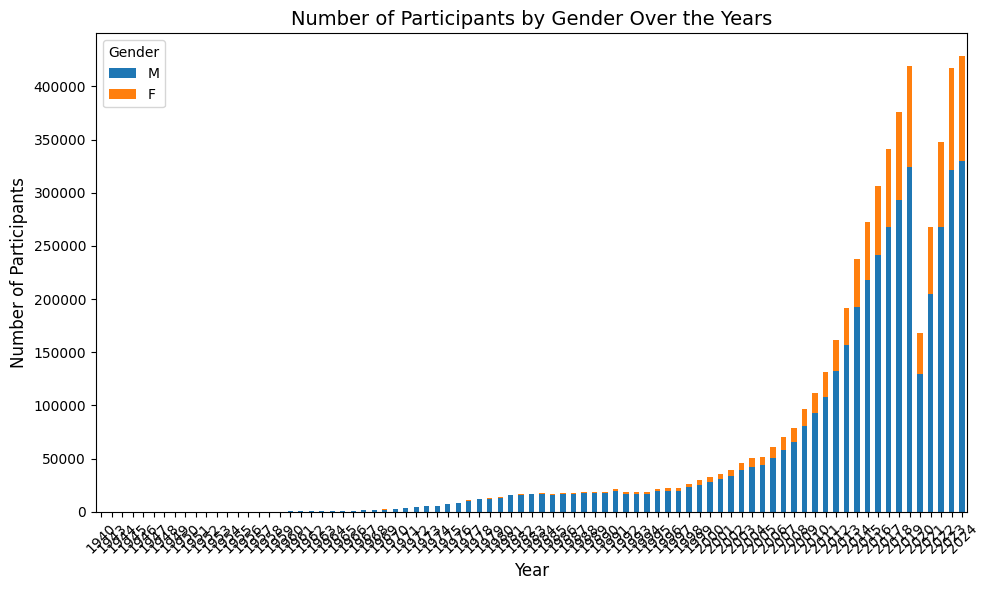

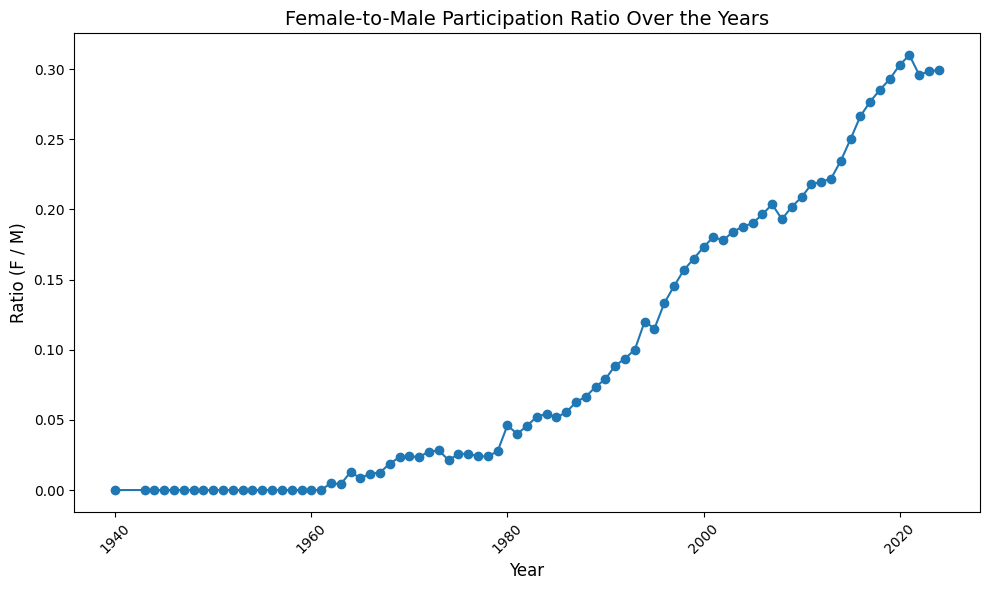

In [6]:
# ------------------------------------------------------------------------------
# 4. Gender Ratio Over Time

# Group by both Year and Gender, then count unique runners
gender_counts = df.groupby(['Year', 'Gender'])['Runner ID'].nunique().reset_index(name='Count')

# Pivot the data so that each Year is a row, and each Gender is a column
gender_pivot = gender_counts.pivot(index='Year', columns='Gender', values='Count').fillna(0)

# If you have only 'M' and 'F', create a ratio column
if 'M' in gender_pivot.columns and 'F' in gender_pivot.columns:
    gender_pivot['Female_to_Male_Ratio'] = gender_pivot['F'] / gender_pivot['M']

# Plot a stacked bar chart of male vs. female participants by year
gender_pivot[['M', 'F']].plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Number of Participants by Gender Over the Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Participants', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# If you want to visualize the female-to-male ratio over time
if 'Female_to_Male_Ratio' in gender_pivot.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(gender_pivot.index, gender_pivot['Female_to_Male_Ratio'], marker='o', linestyle='-')
    plt.title('Female-to-Male Participation Ratio Over the Years', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Ratio (F / M)', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [7]:
# 5. Identify Key Participation Surges or Dips

# You might look at the year-over-year change in total participants
yearly_counts['YoY_Change'] = yearly_counts['Total_Participants'].diff()

# Find the largest increases or decreases
top_5_increases = yearly_counts.nlargest(5, 'YoY_Change')
top_5_decreases = yearly_counts.nsmallest(5, 'YoY_Change')

print("Top 5 biggest year-over-year participation increases:")
print(top_5_increases)

print("\nTop 5 biggest year-over-year participation decreases:")
print(top_5_decreases)  

Top 5 biggest year-over-year participation increases:
    Year  Total_Participants  YoY_Change
79  2021              267952     99720.0
80  2022              347531     79579.0
81  2023              417627     70096.0
72  2014              237290     45901.0
77  2019              419579     43285.0

Top 5 biggest year-over-year participation decreases:
    Year  Total_Participants  YoY_Change
78  2020              168232   -251347.0
50  1992               18096     -3501.0
43  1985               16222     -1117.0
48  1990               18513      -499.0
52  1994               18480      -355.0


[Text(0, 0.0, '0%'),
 Text(0, 0.1, '10%'),
 Text(0, 0.2, '20%'),
 Text(0, 0.30000000000000004, '30%'),
 Text(0, 0.4, '40%'),
 Text(0, 0.5, '50%'),
 Text(0, 0.6000000000000001, '60%'),
 Text(0, 0.7000000000000001, '70%'),
 Text(0, 0.8, '80%'),
 Text(0, 0.9, '90%'),
 Text(0, 1.0, '100%')]

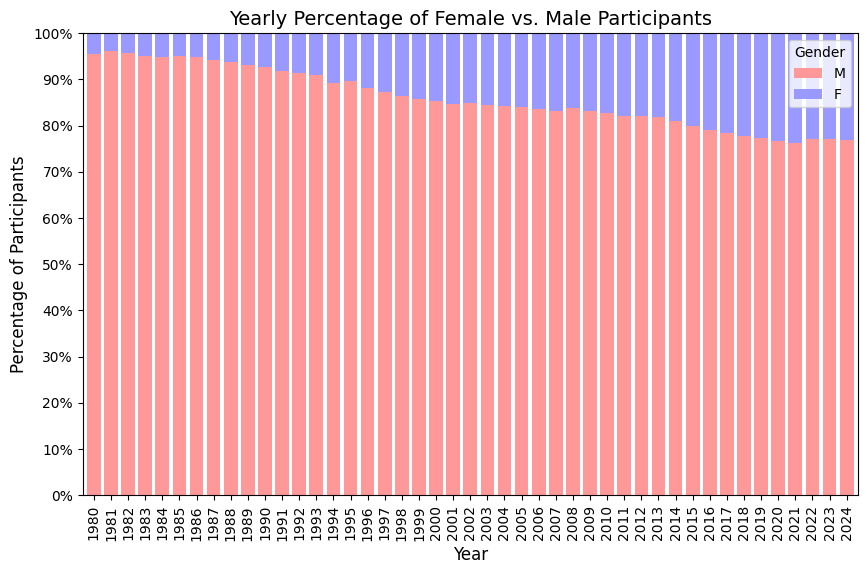

In [8]:
year_gender_counts = (
    df.groupby(['Year', 'Gender'])['Runner ID']
    .nunique()         # or .count() if each row = 1 participant
    .reset_index(name='Count')
)

# Pivot so each gender is a column
gender_pivot = year_gender_counts.pivot(
    index='Year', 
    columns='Gender', 
    values='Count'
).fillna(0)

gender_proportions = gender_pivot.div(gender_pivot.sum(axis=1), axis=0)

# Filter rows: keep only years >= 1980
gender_proportions = gender_proportions.loc[gender_proportions.index >= 1980]

# Filter columns: keep only M, F (in case the pivot had other columns)
gender_proportions = gender_proportions[['M', 'F']]

fig, ax = plt.subplots(figsize=(10, 6))

# Plot as a stacked bar, where each row sums to 1
gender_proportions.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    width=0.8,
    color=['#ff9999', '#9999ff']  # Adjust color palette as desired (F, M)
)

ax.set_title('Yearly Percentage of Female vs. Male Participants', fontsize=14)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Percentage of Participants', fontsize=12)

# Format y-axis to show percentages rather than decimal 0–1
# Option 1: Just set limits and use a percentage label
ax.set_ylim(0, 1)  # Because each bar now sums to 1
ax.set_yticks([i * 0.1 for i in range(11)])  # 0, 0.1, 0.2, ..., 1.0
ax.set_yticklabels([f'{int(x*100)}%' for x in ax.get_yticks()])

In [9]:
# If each row is a unique race entry, simply count rows:
entries_by_distance = df.groupby('Distance KM').size().reset_index(name='Count')

# Alternatively, if you want the number of unique participants (by Runner ID):
# entries_by_distance = df.groupby('Distance')['Runner ID'].nunique().reset_index(name='Count')

# Sort by descending count
entries_by_distance = entries_by_distance.sort_values(by='Distance KM', ascending=False)

# Display the result
entries_by_distance.head(n=20)

,Distance KM,Count
524,5285.0,2
523,5128.0,8
522,5061.0,1
521,5036.0,21
520,5000.0,4
519,4960.0,186
518,4936.0,8
517,4929.0,6
516,4697.0,13
515,4681.0,5


In [10]:
df[df["Distance KM"]>5000]

,Runner ID,First Name,Surname,Nat.,Gender,Age,Age Group,Cat,YOB,Race Count,...,Finish Percentage,Performance Ratio,Distance/Time,Distance KM,Terrain,Time Seconds Finish,Distance Finish,Average Speed,Avg.Speed km/h,Year
797523,2824,Robert,Wimmer,GER,M,38.0,30-39,M35,1965.0,59.0,...,0.05,1.000000,5036km,5036.0,other,1729791.0,NaN,343.485107,10.481,2003
797524,2684,Martin,Wagen,SUI,M,34.0,30-39,M23,1969.0,9.0,...,0.10,0.971197,5036km,5036.0,other,1781092.0,NaN,353.671962,10.179,2003
797525,2398,Wolfgang,Schwerk,GER,M,48.0,40-49,M45,1955.0,123.0,...,0.14,0.958049,5036km,5036.0,other,1805535.0,NaN,358.525616,10.041,2003
797526,4882,Janne,Kankaansyrjä,FIN,M,36.0,30-39,M35,1967.0,17.0,...,0.19,0.941117,5036km,5036.0,other,1838020.0,NaN,364.976172,9.864,2003
797527,737,Karl,Graf,GER,M,53.0,50-59,M50,1950.0,72.0,...,0.24,0.937063,5036km,5036.0,other,1845970.0,NaN,366.554805,9.821,2003
797528,10988,Luc,Dumont-Saint-Priest,FRA,M,39.0,30-39,M35,1964.0,26.0,...,0.29,0.875664,5036km,5036.0,other,1975405.0,NaN,392.256751,9.178,2003
797529,13637,Dusan,Mravlje,SLO,M,50.0,50-59,M50,1953.0,110.0,...,0.33,0.849364,5036km,5036.0,other,2036573.0,NaN,404.402899,8.902,2003
797530,5263,Cor,Westhuis,NED,M,55.0,50-59,M50,1948.0,41.0,...,0.38,0.816064,5036km,5036.0,other,2119675.0,NaN,420.904488,8.553,2003
797531,2237,Hans-Jürgen,Schlotter,GER,M,40.0,40-49,M40,1963.0,24.0,...,0.43,0.812098,5036km,5036.0,other,2130027.0,NaN,422.960087,8.511,2003
797532,853,Joachim,Hauser,GER,M,38.0,30-39,M35,1965.0,34.0,...,0.48,0.809057,5036km,5036.0,other,2138034.0,NaN,424.550040,8.480,2003


/var/folders/ss/kjxldrfs36qgygzmg25sqy100000gn/T/ipykernel_8936/2991895219.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0%}'.format(y) for y in y_vals])


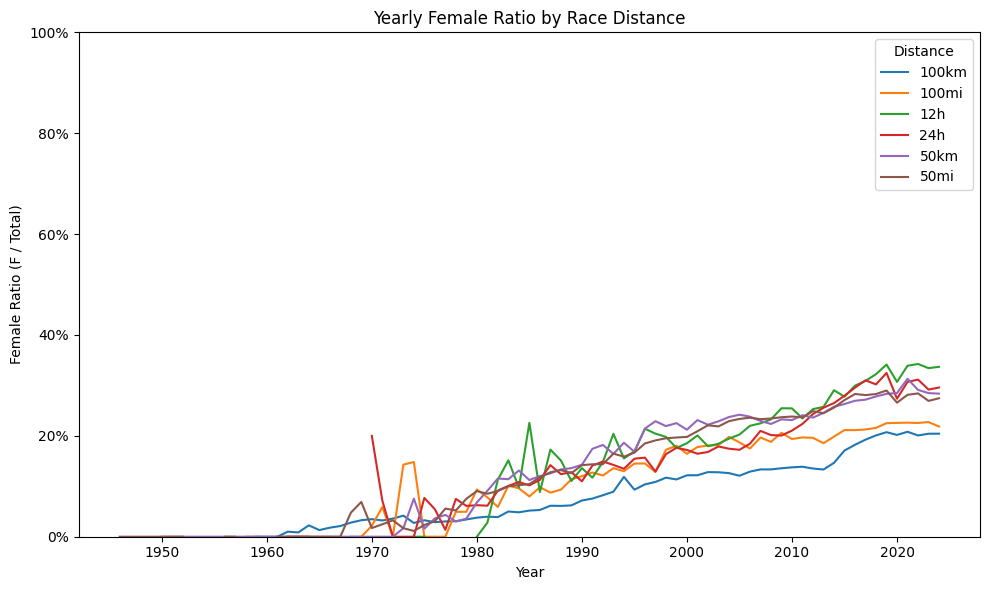

In [11]:
#### Take a look at regression between distance/time and gender ratio

# Filter only the distances of interest
target_distances = ['50km', '100km', '50mi', '100mi', '24h', '12h']
df_filtered = df[df['Distance/Time'].isin(target_distances)]

# ------------------------------------------------------------------------------
# 2. Group by Year, Distance, Gender to count participants
grouped = (
    df_filtered
    .groupby(['Year', 'Distance/Time', 'Gender'])['Runner ID']
    # Use .nunique() if 'Runner ID' is a unique runner identifier
    # Use .count() if each row = one participant result
    .nunique()
    .reset_index(name='Count')
)

# ------------------------------------------------------------------------------
# 3. Pivot so each row is (Year, Distance), with columns for Gender
pivoted = grouped.pivot(
    index=['Year', 'Distance/Time'],
    columns='Gender',
    values='Count'
).fillna(0)

# Ensure you have only 'M' and 'F' columns; if others exist, filter them out:
pivoted = pivoted[['F', 'M']]

# ------------------------------------------------------------------------------
# 4. Calculate the female ratio = F / (F + M)
pivoted['FemaleRatio'] = pivoted['F'] / (pivoted['F'] + pivoted['M'])

# ------------------------------------------------------------------------------
# 5. Pivot again so each Distance is a separate column (and each row is a Year)
final_pivot = pivoted.reset_index().pivot(
    index='Year',
    columns='Distance/Time',
    values='FemaleRatio'
).sort_index()

# ------------------------------------------------------------------------------
# 6. Plot a line chart of female ratio over time, one line per Distance
plt.figure(figsize=(10, 6))
final_pivot.plot(kind='line', ax=plt.gca())

plt.title('Yearly Female Ratio by Race Distance')
plt.xlabel('Year')
plt.ylabel('Female Ratio (F / Total)')

# (Optional) Format y-axis as percentage:
#   1. Keep data as proportion (0–1)
#   2. Convert y-ticks to percentages
plt.ylim(0, 1)
y_vals = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0%}'.format(y) for y in y_vals])

plt.legend(title='Distance')
plt.tight_layout()
plt.show()

/var/folders/ss/kjxldrfs36qgygzmg25sqy100000gn/T/ipykernel_8936/1855503958.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_distance = df_distance[df['Distance KM'] < 160]
/var/folders/ss/kjxldrfs36qgygzmg25sqy100000gn/T/ipykernel_8936/1855503958.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_distance = df_distance[df['Distance KM'] > 50]


Model Coefficients:
  Slope (beta): -0.0004
  Intercept:    0.1940
  R^2 Score:    0.1194


/opt/homebrew/Caskroom/miniconda/base/envs/ml/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


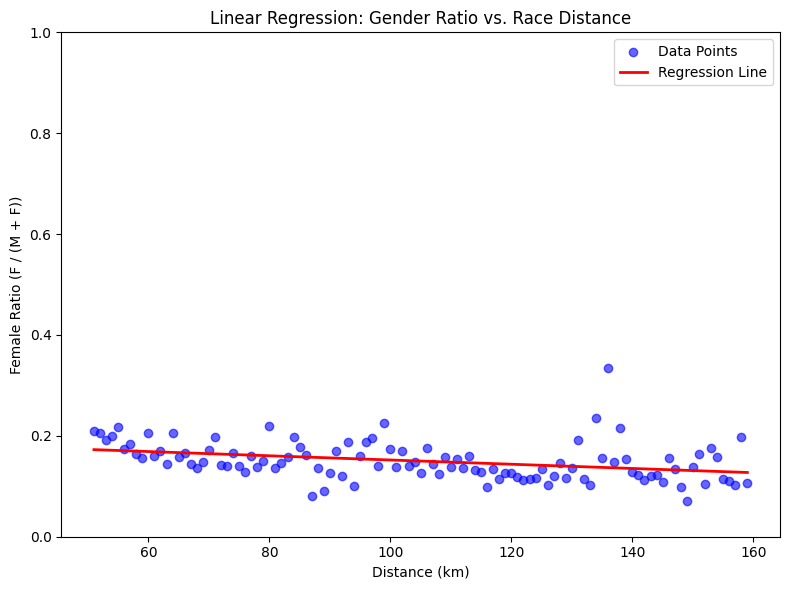

In [12]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# ------------------------------------------------------------------------------
# 2. Calculate the gender ratio for each DistanceKM
#    We'll group by DistanceKM and then see how many M vs. F participants there are.
df_distance = df[df['Event Type'] == 'Distance'].copy()
df_distance = df_distance[df['Distance KM'] < 160]
df_distance = df_distance[df['Distance KM'] > 50]

grouped = (
    df_distance
    .groupby(['Distance KM', 'Gender'])['Runner ID']
    .nunique()  # or .count() if each row is guaranteed unique
    .reset_index(name='Count')
)

# Pivot so we get columns for M and F
pivoted = grouped.pivot(index='Distance KM', columns='Gender', values='Count').fillna(0)

# Ensure columns only contain M and F (in case of other codes)
if set(['M', 'F']).issubset(pivoted.columns):
    pivoted = pivoted[['M', 'F']]
else:
    # If your data could have unexpected gender categories,
    # handle that here or raise a warning.
    pass

# Compute female ratio = F / (F + M)
pivoted['FemaleRatio'] = pivoted['F'] / (pivoted['M'] + pivoted['F'])

# Drop any rows where total participants = 0 (edge cases)
pivoted = pivoted.dropna(subset=['FemaleRatio'])

# Reset index so DistanceKM becomes a column again
pivoted.reset_index(inplace=True)

# ------------------------------------------------------------------------------
# 3. Build a simple linear regression model (DistanceKM -> FemaleRatio)
X = pivoted[['Distance KM']]     # predictor (distance)
y = pivoted['FemaleRatio']      # target (gender ratio)

model = LinearRegression()
model.fit(X, y)

# ------------------------------------------------------------------------------
# 4. Evaluate the model
r_squared = model.score(X, y)
slope = model.coef_[0]
intercept = model.intercept_

print("Model Coefficients:")
print(f"  Slope (beta): {slope:.4f}")
print(f"  Intercept:    {intercept:.4f}")
print(f"  R^2 Score:    {r_squared:.4f}")

# ------------------------------------------------------------------------------
# 5. (Optional) Visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.6, label='Data Points')

# Predicted line
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred_line = model.predict(X_line)
plt.plot(X_line, y_pred_line, color='red', linewidth=2, label='Regression Line')

plt.xlabel('Distance (km)')
plt.ylabel('Female Ratio (F / (M + F))')
plt.title('Linear Regression: Gender Ratio vs. Race Distance')
plt.ylim(0, 1)  # Gender ratio is 0–1
plt.legend()
plt.tight_layout()
plt.show()

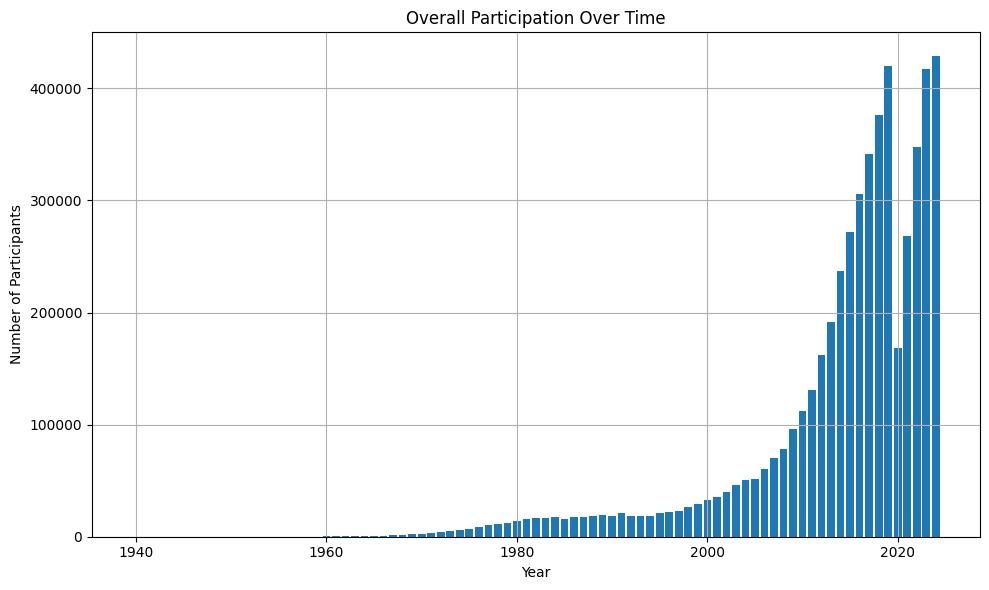

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Group by Year and count unique participants
yearly_counts = df.groupby('Year')['Runner ID'].nunique().reset_index(name='TotalParticipants')

# 2. Plot a line or bar chart of total participants over time
plt.figure(figsize=(10, 6))
plt.bar(yearly_counts['Year'], yearly_counts['TotalParticipants'])
plt.title('Overall Participation Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Participants')
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

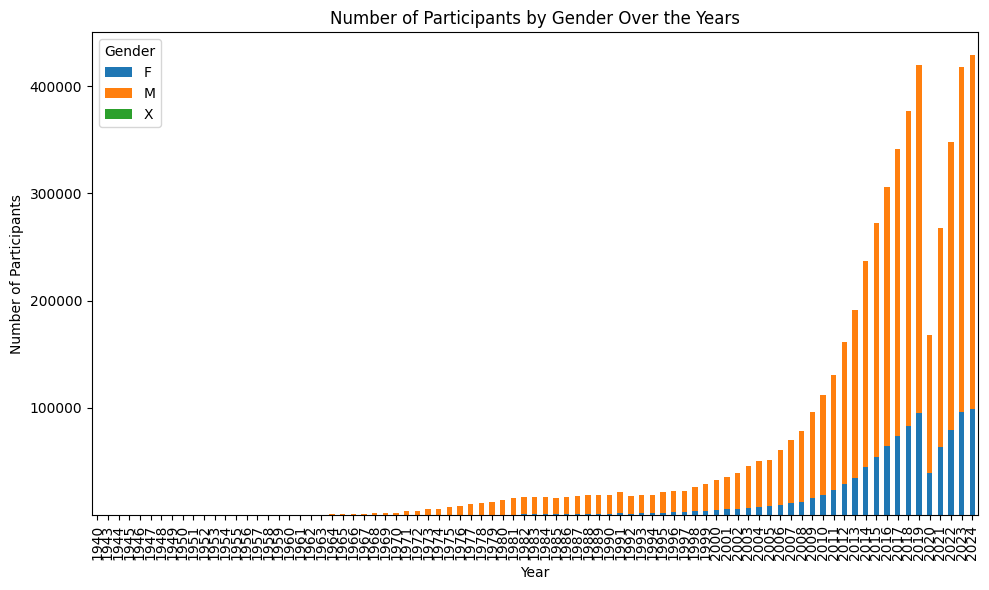

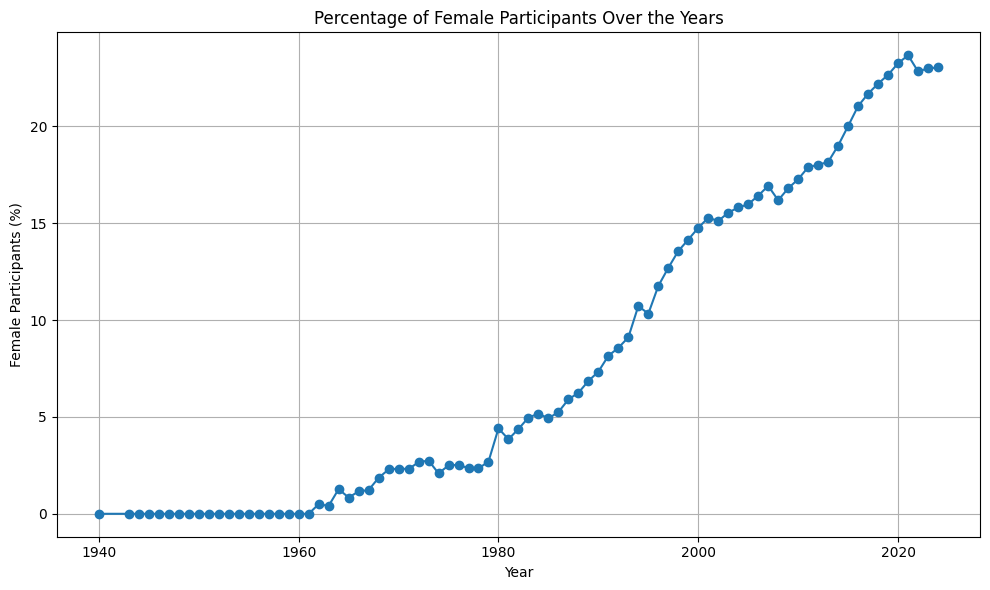


Number of Unique Runners by Decade and Gender:


Gender,F,M,X,Total
Decade,,,,
1940,0.0,119.0,0.0,119.0
1950,0.0,546.0,0.0,546.0
1960,92.0,5118.0,0.0,5210.0
1970,1068.0,37927.0,0.0,38995.0
1980,4628.0,72894.0,0.0,77522.0
1990,11638.0,87134.0,0.0,98772.0
2000,45911.0,217842.0,1.0,263754.0
2010,266584.0,897331.0,18.0,1163933.0
2020,227009.0,716464.0,120.0,943593.0


<Figure size 1000x600 with 0 Axes>

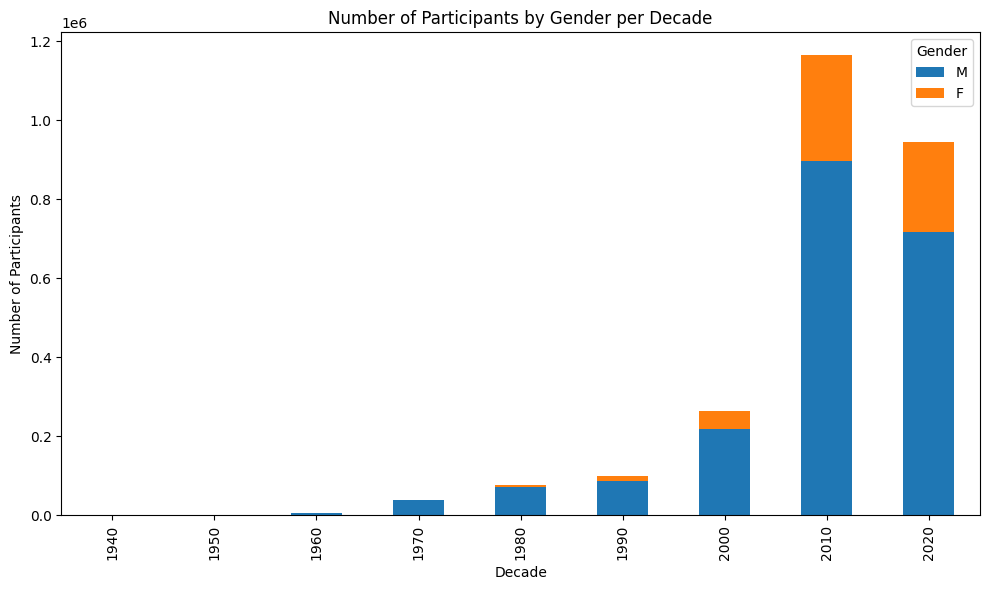


Top 5 Years by Highest Female Percentage:


Gender,F,Total,Female_Percentage
Year,,,
2021,63410.0,267952.0,23.664686
2020,39115.0,168232.0,23.250630
2024,98725.0,428585.0,23.035104
2023,95996.0,417627.0,22.986062
2022,79344.0,347531.0,22.830769


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------------------------------
# 1. BASIC DATA PREPARATION
# -----------------------------------------------------
# Assuming your DataFrame is already loaded into 'df'.
# Make sure 'Year' is an integer column (or convert if needed).
df['Year'] = df['Year'].astype(int)

# -----------------------------------------------------
# 2. NUMBER OF PARTICIPANTS BY GENDER OVER TIME
# -----------------------------------------------------
# Count unique Runner IDs by year and gender to avoid double-counting the same runner in multiple events.
year_gender_counts = (
    df.groupby(['Year', 'Gender'])['Runner ID']
      .nunique()
      .reset_index(name='Num_Runners')
)

# Pivot the table so columns are genders and rows are years
year_gender_pivot = year_gender_counts.pivot(
    index='Year',
    columns='Gender',
    values='Num_Runners'
).fillna(0)

# Optional: Sort by Year if not already sorted
year_gender_pivot = year_gender_pivot.sort_index()

# Create a stacked bar chart
plt.figure(figsize=(10, 6))
year_gender_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Number of Participants by Gender Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Participants')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

# -----------------------------------------------------
# 3. PROPORTION OF FEMALE RUNNERS OVER TIME
# -----------------------------------------------------
# Calculate total runners per year
year_gender_pivot['Total'] = year_gender_pivot.sum(axis=1)

# If your dataset labels females as 'F' and males as 'M',
# adjust this section if your labels differ.
if 'F' in year_gender_pivot.columns:
    year_gender_pivot['Female_Percentage'] = (
        year_gender_pivot['F'] / year_gender_pivot['Total'] * 100
    )
else:
    # In case 'Female' is spelled out or another label is used:
    female_col = [col for col in year_gender_pivot.columns if col.lower().startswith('f')][0]
    year_gender_pivot['Female_Percentage'] = (
        year_gender_pivot[female_col] / year_gender_pivot['Total'] * 100
    )

# Line plot of female percentage
plt.figure(figsize=(10, 6))
plt.plot(
    year_gender_pivot.index,
    year_gender_pivot['Female_Percentage'],
    marker='o'
)
plt.title('Percentage of Female Participants Over the Years')
plt.xlabel('Year')
plt.ylabel('Female Participants (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

# -----------------------------------------------------
# 4. DECADE-BY-DECADE ANALYSIS (TABLE + BAR CHART)
# -----------------------------------------------------
# Create a new column for decade
df['Decade'] = (df['Year'] // 10) * 10

# Group by decade and gender
decade_gender_counts = (
    df.groupby(['Decade', 'Gender'])['Runner ID']
      .nunique()
      .reset_index(name='Num_Runners')
)

# Pivot for a table of runners per decade by gender
decade_gender_pivot = decade_gender_counts.pivot(
    index='Decade',
    columns='Gender',
    values='Num_Runners'
).fillna(0)

decade_gender_pivot['Total'] = decade_gender_pivot.sum(axis=1)

# Print the table in Jupyter (or display it in any environment)
print("\nNumber of Unique Runners by Decade and Gender:")
display(decade_gender_pivot)

# Optionally, create a bar chart
plt.figure(figsize=(10, 6))
decade_gender_pivot[['M', 'F']].plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Number of Participants by Gender per Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Participants')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

# -----------------------------------------------------
# 5. OPTIONAL: HIGHLIGHT YEARS WITH HIGHEST FEMALE SHARE
# -----------------------------------------------------
# If you want to see which years had the highest female percentage:
top_female_years = (
    year_gender_pivot
    .sort_values(by='Female_Percentage', ascending=False)
    .head(5)
)
print("\nTop 5 Years by Highest Female Percentage:")
display(top_female_years[['F', 'Total', 'Female_Percentage']])

# -----------------------------------------------------
# 6. OPTIONAL: SEABORN STYLING (if you want a nicer look)
# -----------------------------------------------------
sns.set_style('whitegrid')
sns.set_context('talk')
# Re-run the above plots with seaborn styling for a different aesthetic.

In [15]:
# Count how many records per location
location_counts = df['Race Location'].value_counts()

# Choose the top N locations (e.g., top 5 or 10)
top_n = 5
top_locations = location_counts.head(top_n).index.tolist()

# Filter the dataframe to only include these top locations
df_top_locations = df[df['Race Location'].isin(top_locations)]

In [16]:
year_loc_gender_counts = (
    df_top_locations.groupby(['Year', 'Race Location', 'Gender'])['Runner ID']
    .nunique()
    .reset_index(name='Num_Runners')
)

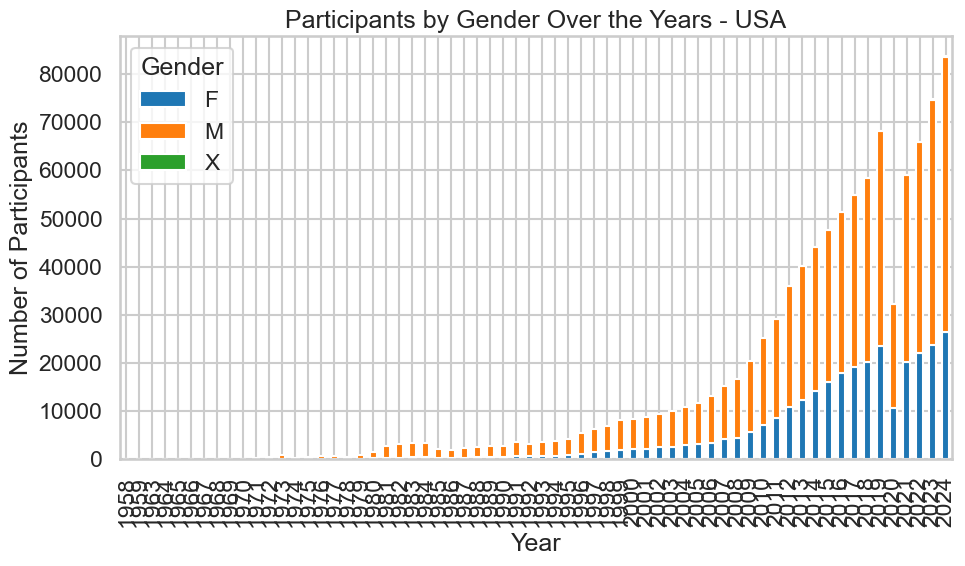

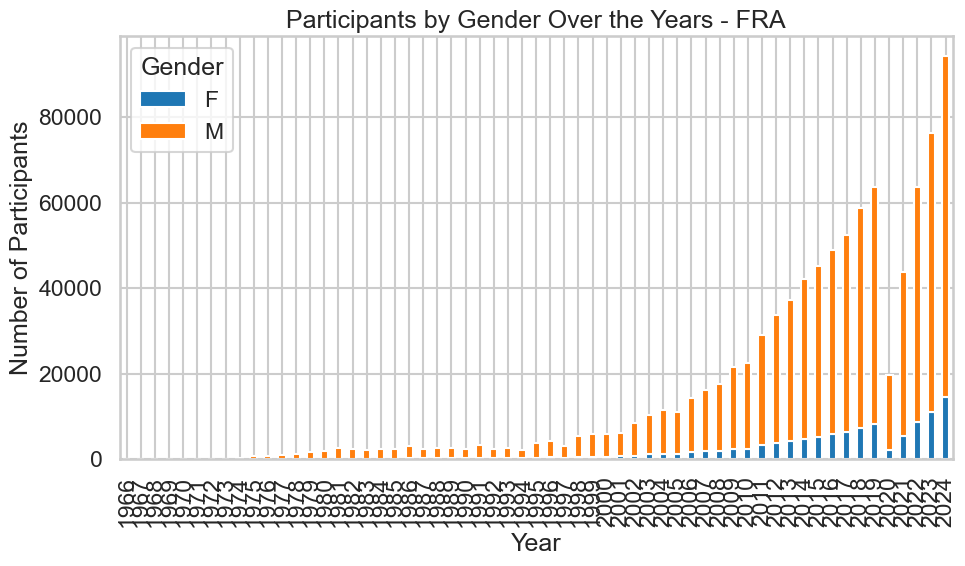

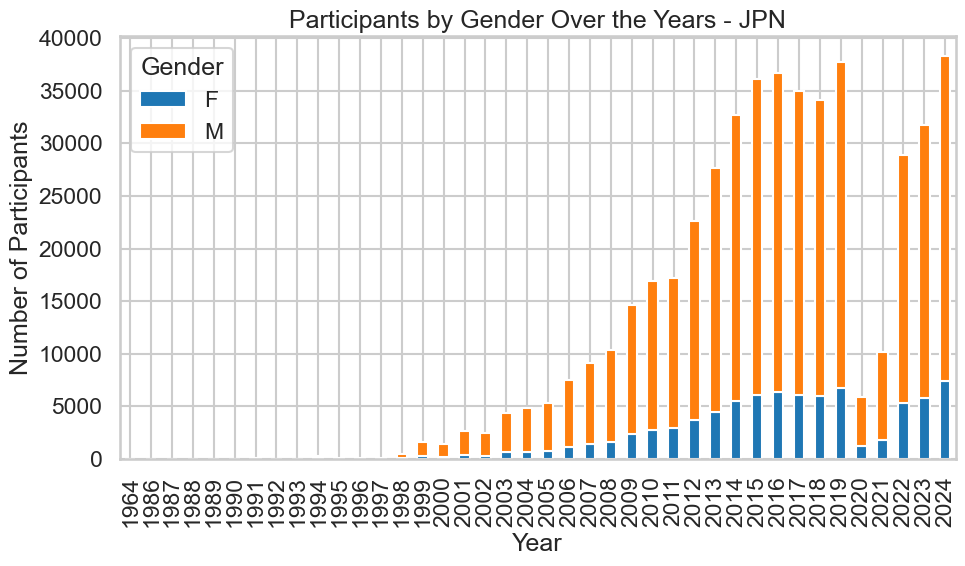

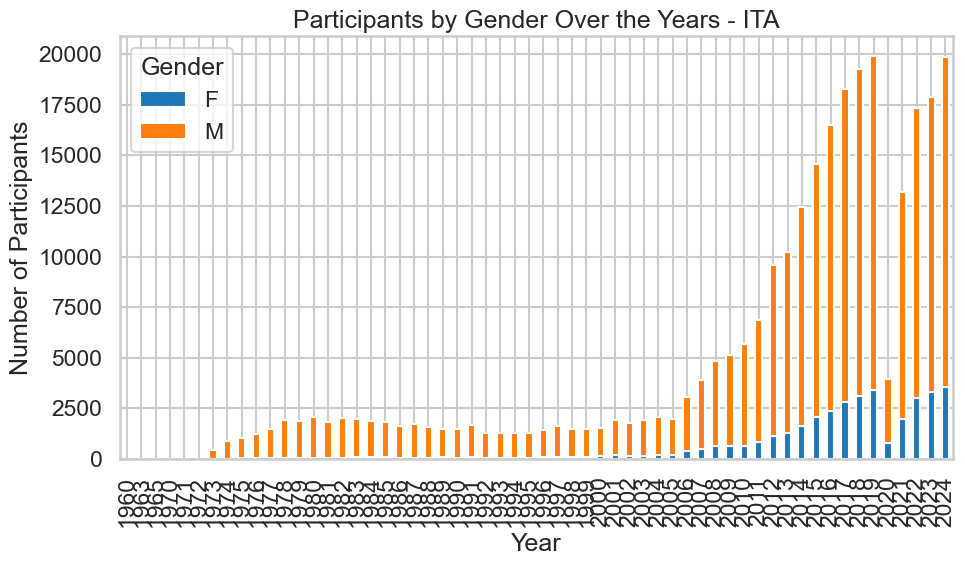

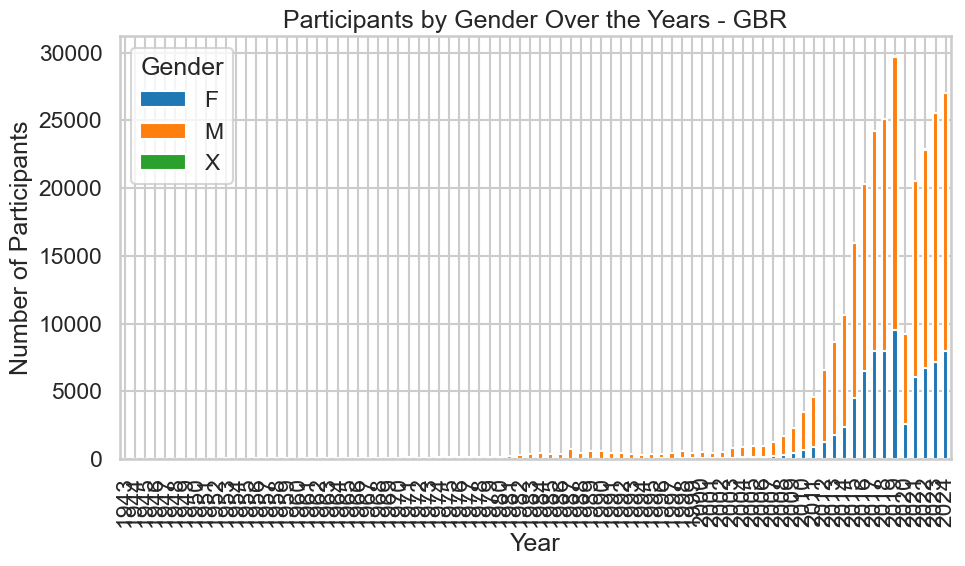

In [19]:
for loc in top_locations:
    df_loc = year_loc_gender_counts[year_loc_gender_counts['Race Location'] == loc]
    pivot_loc = df_loc.pivot(index='Year', columns='Gender', values='Num_Runners').fillna(0)
    pivot_loc = pivot_loc.sort_index()
    
    # Stacked bar chart
    pivot_loc.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f"Participants by Gender Over the Years - {loc}")
    plt.xlabel('Year')
    plt.ylabel('Number of Participants')
    plt.tight_layout()
    plt.show()

In [21]:
race_agg = df.groupby('Event ID').agg({
    'Event': 'first',
    'Race Location': 'first',
    'Event Type': 'first',
    'Terrain': 'first',
    'Distance Winner': 'first',          # Use as the race distance (in km)
    'Elevation Gain': 'first',
    'Total Finishers': 'first',
    'Male Finishers': 'first',
    'Female Finishers': 'first',
    'Year': 'first',
    'Decade': 'first',
    'Date': 'first'
}).reset_index()

# Rename columns to match our model's expected names
race_agg.rename(columns={
    'Distance Winner': 'Distance_km'
}, inplace=True)

# Calculate the female participation rate as a proportion (0 to 1)
race_agg['Female_Participation'] = race_agg['Female Finishers'] / race_agg['Total Finishers']

# Optional: rearrange columns to a preferred order
race_level_df = race_agg[['Event ID', 'Event', 'Race Location', 'Event Type', 'Terrain',
                          'Distance_km', 'Elevation Gain', 'Total Finishers',
                          'Male Finishers', 'Female Finishers', 'Female_Participation',
                          'Year', 'Decade', 'Date']]

# Preview the aggregated race-level data
print(race_level_df.head())

   Event ID                                              Event Race Location  \
0       1.0                   Edersee Supermarathon 60km (GER)           GER   
1       2.0    20ème des 48 heures pédestres de Surgères (FRA)           FRA   
2       3.0  20ème des 48 heures pédestres de Surgères - 24...           FRA   
3       4.0  20ème des 48 heures pédestres de Surgères - 12...           FRA   
4       5.0  20ème des 48 heures pédestres de Surgères - 6h...           FRA   

  Event Type Terrain  Distance_km  Elevation Gain  Total Finishers  \
0   Distance   trail          NaN             NaN             84.0   
1       Time   track      405.639             NaN             24.0   
2       Time   track      230.716             NaN             24.0   
3       Time   track      126.969             NaN             24.0   
4       Time   track       66.651             NaN             24.0   

   Male Finishers  Female Finishers  Female_Participation  Year  Decade  \
0            73.0      

Mean Absolute Error: 0.097
R^2 Score: 0.220


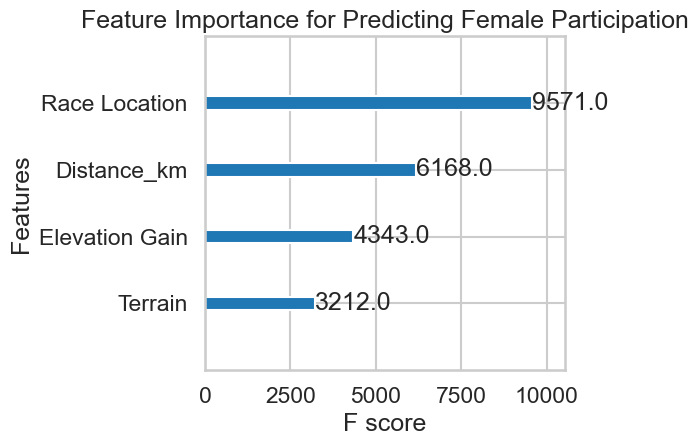

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Encode categorical variables
categorical_cols = ['Race Location', 'Terrain', 'Event Type']
for col in categorical_cols:
    le = LabelEncoder()
    race_level_df[col] = le.fit_transform(race_level_df[col])

# Define features and target
features = ['Race Location', 'Distance_km', 'Elevation Gain', 'Terrain', 'Total Finishers', 'Event Type']
X = race_level_df[features]
y = race_level_df['Female_Participation']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train an XGBoost regressor
model = xgb.XGBRegressor(n_estimators=500, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.3f}")
print(f"R^2 Score: {r2:.3f}")

# Plot feature importance
xgb.plot_importance(model)
plt.title("Feature Importance for Predicting Female Participation")
plt.tight_layout()
plt.show()